In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TensorBoard
from keras.callbacks import LambdaCallback
from keras import backend as K

import tensorflow as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 28, 28, 1)
(55000, 10)


In [7]:
batch_x, batch_y = mnist.train.next_batch(batch_size=10)

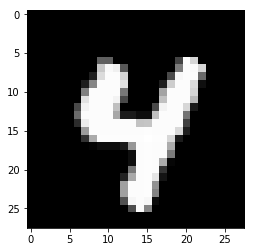

In [8]:
plt.imshow(batch_x[5,:,:,0], cmap='gray')

In [9]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                19610     
Total params: 20,620
Trainable params: 20,620
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(mnist.train.images, 
                    mnist.train.labels, 
                    batch_size=32, 
                    epochs=5,
                    validation_data=(mnist.validation.images, mnist.validation.labels),
                    callbacks=[ReduceLROnPlateau(), EarlyStopping(patience=3)]
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 32s - loss: 0.2454 - acc: 0.9280 - val_loss: 0.0986 - val_acc: 0.9718
Epoch 2/5
55000/55000 [==============================] - 32s - loss: 0.0846 - acc: 0.9753 - val_loss: 0.0731 - val_acc: 0.9786
Epoch 3/5
55000/55000 [==============================] - 33s - loss: 0.0647 - acc: 0.9812 - val_loss: 0.0642 - val_acc: 0.9818
Epoch 4/5
55000/55000 [==============================] - 32s - loss: 0.0570 - acc: 0.9839 - val_loss: 0.0589 - val_acc: 0.9826
Epoch 5/5
55000/55000 [==============================] - 32s - loss: 0.0518 - acc: 0.9854 - val_loss: 0.0581 - val_acc: 0.9832
